Dataset: Reading Property Data December 2022 

Data source: Zoopla (webscraping)

Brief description: 

The original dataset contained information on 950 properties which were within a 10-mile radius of the Reading (Berkshire, UK) area. Data was obtained through webscraping on Zoopla. The data included listing price, listing info, room info, and location.

Area of interest: 2-bed and 3-bed properties in this area

Key findings (properties under £1m):

* Of the 887 properties on the market which were under £1m, 29% were 3-bed properties, 28% were 2-bed, 22% were 4-bed, and 14% were 1-bed.

* The median list price of a flat is: £258,475, whilst the median list price of a house is: £515,000.

* 2-bed flat vs. 2-bed house:
    * The median list price of a 2-bed flat is £290,000 (lower quartile = £250,000; upper quartile = £327,000).
    * The median list price of a 2-bed house is £350,000 (lower quartile = £300,000; upper quartile = £412,000). 
    * This represents an increase of 20.69%.
    

* 3-bed flat vs. 3-bed house:
    * The median list price of a 3-bed flat is £325,000 (lower quartile = £290,000; upper quartile = £335,000).
    * The median list price of a 3-bed house is £460,000 (lower quartile = £400,000; upper quartile = £550,000). 
    * This represents an increase of 41.54%.

## Preliminary steps

Import necessary Python packages

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset (read in csv file) and view the first 10 rows

In [414]:
df = pd.read_csv("/Users/andreakoko/Documents/Reading_housing_data_Dec_2022_5miles_noretirement_nosharedownership_noland.csv")
df.head(10)

,Unnamed: 0,Listing price,Listing info,All rooms,Location
0,0,"£850,000",4 bed detached house for sale,Bedrooms4Bathrooms3Living rooms3,"Bluebell Crescent, Woodley, Reading RG5"
1,1,"£290,000",2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"Kennet Walk, Reading RG1"
2,2,"£325,000",2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"46 Bath Road, Reading RG1"
3,3,"£200,000",1 bed flat for sale,Bedrooms1Bathrooms1Living rooms1,"Russell Street, Reading RG1"
4,4,"£499,000",3 bed semi-detached house for sale,Bedrooms3Bathrooms2Living rooms1,"Woolhampton Way, Reading RG2"
5,5,"£525,000",3 bed semi-detached house for sale,Bedrooms3Bathrooms1Living rooms2,"Southcote Farm Lane, Reading RG30"
6,6,"£700,000",6 bed semi-detached house for sale,Bedrooms6Bathrooms3Living rooms1,"Beech Lane, Reading RG6"
7,7,"£625,000",4 bed detached bungalow for sale,Bedrooms4Bathrooms1Living rooms2,"Nash Grove Lane, Finchampstead, Wokingham RG40"
8,8,"£625,000",4 bed detached house for sale,Bedrooms4Bathrooms2Living rooms2,"Anvil Close, Spencers Wood, Reading, Berkshire..."
9,9,"£750,000",5 bed detached house for sale,Bedrooms5Bathrooms4Living rooms3,"Cressingham Road, Reading, Berkshire RG2"


View a random sample of the dataset

In [415]:
df.sample(10)

,Unnamed: 0,Listing price,Listing info,All rooms,Location
209,209,"£400,000",4 bed terraced house for sale,Bedrooms4Bathrooms2Living rooms2,"Swainstone Road, Reading RG2"
771,771,"£225,000",1 bed maisonette for sale,Bedrooms1Bathrooms1Living rooms1,"Maiden Place, Reading, Berkshire RG6"
273,273,"£335,000",2 bed terraced house for sale,Bedrooms2Bathrooms1Living rooms1,"Mannock Way, Woodley, Reading RG5"
614,614,"£500,000",3 bed semi-detached house for sale,Bedrooms3Bathrooms1Living rooms1,"Nightingale Road, Woodley, Reading RG5"
669,669,"£420,000",3 bed end terrace house for sale,Bedrooms3Bathrooms1Living rooms2,"Kennedy Drive, Pangbourne, Reading, Berkshire RG8"
70,70,"£350,000",2 bed detached bungalow for sale,Bedrooms2Bathrooms1Living rooms1,"Tuxford Mews, Reading RG30"
378,378,"£330,000",2 bed flat for sale,Bedrooms2Bathrooms2Living rooms1,"The Parma At Renaissance, 2 Bed Apartment, Por..."
833,833,"£350,000",3 bed terraced house for sale,Bedrooms3Bathrooms1Living rooms2,"Bourton Close, Tilehurst, Reading RG30"
288,288,"£525,000",4 bed end terrace house for sale,Bedrooms4Bathrooms2Living rooms1,"Reading RG1,"
106,106,"£695,000",4 bed semi-detached house for sale,Bedrooms4Bathrooms2Living rooms2,"Old Bath Road, Calcot, Reading RG31"


View dataset info

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     950 non-null    int64 
 1   Listing price  950 non-null    object
 2   Listing info   950 non-null    object
 3   All rooms      950 non-null    object
 4   Location       950 non-null    object
dtypes: int64(1), object(4)
memory usage: 37.2+ KB


## Data Preparation

Steps:
1. Remove Unnamed column
2. Rename columns for cleaner code
2. Remove £ symbol from listing price and convert column data type to int64
3. Split 'Listing info' to extract property type information (split between 'bed' and 'for')
4. Split 'All rooms' and create separate columns for 'bedrooms', 'bathrooms', 'living rooms'
6. Create a new column and group all property types under two categories: either 'house' or 'flat'

Drop unnamed column (duplicate of index)

In [417]:
df = df.drop("Unnamed: 0", axis=1)
df.head(10)

,Listing price,Listing info,All rooms,Location
0,"£850,000",4 bed detached house for sale,Bedrooms4Bathrooms3Living rooms3,"Bluebell Crescent, Woodley, Reading RG5"
1,"£290,000",2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"Kennet Walk, Reading RG1"
2,"£325,000",2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"46 Bath Road, Reading RG1"
3,"£200,000",1 bed flat for sale,Bedrooms1Bathrooms1Living rooms1,"Russell Street, Reading RG1"
4,"£499,000",3 bed semi-detached house for sale,Bedrooms3Bathrooms2Living rooms1,"Woolhampton Way, Reading RG2"
5,"£525,000",3 bed semi-detached house for sale,Bedrooms3Bathrooms1Living rooms2,"Southcote Farm Lane, Reading RG30"
6,"£700,000",6 bed semi-detached house for sale,Bedrooms6Bathrooms3Living rooms1,"Beech Lane, Reading RG6"
7,"£625,000",4 bed detached bungalow for sale,Bedrooms4Bathrooms1Living rooms2,"Nash Grove Lane, Finchampstead, Wokingham RG40"
8,"£625,000",4 bed detached house for sale,Bedrooms4Bathrooms2Living rooms2,"Anvil Close, Spencers Wood, Reading, Berkshire..."
9,"£750,000",5 bed detached house for sale,Bedrooms5Bathrooms4Living rooms3,"Cressingham Road, Reading, Berkshire RG2"


In [418]:
# df["All rooms"].value_counts()

Rename and standardise column names

In [419]:
df1 = df.rename({"Listing price": "list_price", "Listing info":"list_info", "All rooms":"rooms", "Location":"location"}, axis=1)
df1.head()

,list_price,list_info,rooms,location
0,"£850,000",4 bed detached house for sale,Bedrooms4Bathrooms3Living rooms3,"Bluebell Crescent, Woodley, Reading RG5"
1,"£290,000",2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"Kennet Walk, Reading RG1"
2,"£325,000",2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"46 Bath Road, Reading RG1"
3,"£200,000",1 bed flat for sale,Bedrooms1Bathrooms1Living rooms1,"Russell Street, Reading RG1"
4,"£499,000",3 bed semi-detached house for sale,Bedrooms3Bathrooms2Living rooms1,"Woolhampton Way, Reading RG2"


Remove '£' sympbol and ',' from 'list_price'

In [420]:
df1.list_price = df1.list_price.str.strip("£").str.replace(",", "")
df1.head()

,list_price,list_info,rooms,location
0,850000,4 bed detached house for sale,Bedrooms4Bathrooms3Living rooms3,"Bluebell Crescent, Woodley, Reading RG5"
1,290000,2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"Kennet Walk, Reading RG1"
2,325000,2 bed flat for sale,Bedrooms2Bathrooms1Living rooms1,"46 Bath Road, Reading RG1"
3,200000,1 bed flat for sale,Bedrooms1Bathrooms1Living rooms1,"Russell Street, Reading RG1"
4,499000,3 bed semi-detached house for sale,Bedrooms3Bathrooms2Living rooms1,"Woolhampton Way, Reading RG2"


Check the data type of each column/variable

In [421]:
df1.dtypes

list_price    object
list_info     object
rooms         object
location      object
dtype: object

'List_price' column contains string elements, hence showing as 'object' datatype. Column contains instances of "POA" (price on asking). 

Return a new dataframe without rows with "POA".

In [422]:
df1 = df1[df1.list_price != "POA"]


Convert the data type of'list_price' column. Change from 'object' to 'integer'. 

In [423]:
df1.list_price = df1.list_price.astype("int64")

In [424]:
df1.dtypes

list_price     int64
list_info     object
rooms         object
location      object
dtype: object

Split 'list_info' values to extract property type

In [425]:
# View a sample

df1.list_info.sample(10)

528    3 bed semi-detached house for sale
877         2 bed terraced house for sale
542         4 bed detached house for sale
578      3 bed end terrace house for sale
256         5 bed detached house for sale
520                   1 bed flat for sale
437    3 bed semi-detached house for sale
116    3 bed semi-detached house for sale
310         4 bed detached house for sale
289         2 bed terraced house for sale
Name: list_info, dtype: object

Perform string manipulation to slice off the beginning (x bed) and end (for sale) to extract property type

In [426]:
df1.list_info = df1.list_info.str[6:-8]

Check if slicing worked

In [427]:
df1.head()

,list_price,list_info,rooms,location
0,850000,detached house,Bedrooms4Bathrooms3Living rooms3,"Bluebell Crescent, Woodley, Reading RG5"
1,290000,flat,Bedrooms2Bathrooms1Living rooms1,"Kennet Walk, Reading RG1"
2,325000,flat,Bedrooms2Bathrooms1Living rooms1,"46 Bath Road, Reading RG1"
3,200000,flat,Bedrooms1Bathrooms1Living rooms1,"Russell Street, Reading RG1"
4,499000,semi-detached house,Bedrooms3Bathrooms2Living rooms1,"Woolhampton Way, Reading RG2"


Check 'rooms' column by viewing a random sample

In [428]:
df1.rooms.sample(10)

583    Bedrooms2Bathrooms1Living rooms2
247    Bedrooms2Bathrooms1Living rooms1
926             Bathrooms1Living rooms1
432    Bedrooms4Bathrooms2Living rooms3
76     Bedrooms2Bathrooms1Living rooms1
103    Bedrooms3Bathrooms2Living rooms1
212    Bedrooms4Bathrooms4Living rooms4
66     Bedrooms3Bathrooms1Living rooms2
783    Bedrooms3Bathrooms2Living rooms2
796    Bedrooms2Bathrooms1Living rooms1
Name: rooms, dtype: object

Split 'rooms' column in order to extract number of bedrooms, bathrooms and living rooms, and to create separate columns for each

In [429]:
import re

Create a function to perform split

In [430]:
def split_rooms(value):
    splitted = re.split('(\d+)', value)
    return splitted

Check if function works as intended by applying it to first value

In [431]:
split_rooms(df1.rooms[0])

['Bedrooms', '4', 'Bathrooms', '3', 'Living rooms', '3', '']

Apply function to entire column using lambda function

In [432]:
df1.rooms = df1.rooms.apply(lambda x: split_rooms(x))


Check if string values have been split

In [433]:
df1.rooms.head()

0    [Bedrooms, 4, Bathrooms, 3, Living rooms, 3, ]
1    [Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]
2    [Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]
3    [Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]
4    [Bedrooms, 3, Bathrooms, 2, Living rooms, 1, ]
Name: rooms, dtype: object

In [434]:
df1.rooms.sample(20)

559    [Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]
775    [Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]
47     [Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]
567    [Bedrooms, 2, Bathrooms, 1, Living rooms, 2, ]
891    [Bedrooms, 4, Bathrooms, 2, Living rooms, 2, ]
888    [Bedrooms, 5, Bathrooms, 3, Living rooms, 2, ]
538    [Bedrooms, 3, Bathrooms, 2, Living rooms, 1, ]
663    [Bedrooms, 3, Bathrooms, 2, Living rooms, 1, ]
739    [Bedrooms, 4, Bathrooms, 2, Living rooms, 2, ]
285    [Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]
589    [Bedrooms, 6, Bathrooms, 4, Living rooms, 3, ]
95     [Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]
619    [Bedrooms, 4, Bathrooms, 2, Living rooms, 2, ]
944    [Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]
506    [Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]
163    [Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]
519                                   [Bedrooms, 1, ]
772    [Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]
40     [Bedrooms, 7, Bathroo

Write a function to return the number of bedrooms if 'bedroom' is listed under 'rooms'

In [435]:
def bedrooms_num(list):
    if "Bedrooms" in list:
        bedroom_index = list.index("Bedrooms")
        bed_number_index = bedroom_index+1
        return list[bed_number_index]
    else:
        return np.nan  
        

Check if function works

In [436]:
bedrooms_num(df1.rooms[0])

'4'

In [437]:
bedrooms_num(df1.rooms[27])

'2'

Create same function to return bathroom and living room numbers if they are listed under 'rooms'

In [438]:
def bathrooms_num(list):
    if "Bathrooms" in list:
        bathroom_index = list.index("Bathrooms")
        bathroom_number_index = bathroom_index+1
        return list[bathroom_number_index]
    else:
        return np.nan

In [439]:
def livingroom_num(list):
    if "Living rooms" in list:
        livingroom_index = list.index("Living rooms")
        livingroom_number_index = livingroom_index+1
        return list[livingroom_number_index]
    else:
        return np.nan

Create 3 new columns to respectively show the number of bedrooms, bathrooms, and living rooms by applying the above functions to the 'rooms' column

In [440]:
df1["bedrooms"] = df1.rooms.apply(lambda x: bedrooms_num(x))
df1["bathrooms"] = df1.rooms.apply(lambda x: bathrooms_num(x))
df1["living_rooms"] = df1.rooms.apply(lambda x: livingroom_num(x))

Check that the new columns have been added to the dataframe

In [441]:
df1.head()

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
0,850000,detached house,"[Bedrooms, 4, Bathrooms, 3, Living rooms, 3, ]","Bluebell Crescent, Woodley, Reading RG5",4,3,3
1,290000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Kennet Walk, Reading RG1",2,1,1
2,325000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","46 Bath Road, Reading RG1",2,1,1
3,200000,flat,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Russell Street, Reading RG1",1,1,1
4,499000,semi-detached house,"[Bedrooms, 3, Bathrooms, 2, Living rooms, 1, ]","Woolhampton Way, Reading RG2",3,2,1


In [442]:
df1.sample(20)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
928,650000,detached house,"[Bedrooms, 4, Bathrooms, 2, Living rooms, 3, ]","The Pightle, Grazeley Green, Reading, Berkshir...",4,2,3
782,550000,terraced house,"[Bedrooms, 5, Bathrooms, 3, Living rooms, 1, ]","Kings Road, Reading RG1",5,3,1
736,270000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Meadow Way, Caversham RG4",2,1,1
796,260000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","119 Orts Road, Reading RG1",2,1,1
544,200000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Burghfield Road, Reading, Berkshire RG30",2,1,1
429,450000,semi-detached house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]","Ashridge Road, Wokingham RG40",3,1,1
10,425000,semi-detached house,"[Bedrooms, 4, Bathrooms, 2, Living rooms, 2, ]","Basingstoke Road, Reading, Berkshire RG2",4,2,2
39,550000,terraced house,"[Bedrooms, 6, Bathrooms, 2, Living rooms, 1, ]","Addington Road, Reading RG1",6,2,1
656,1100000,detached house,"[Bedrooms, 4, Bathrooms, 1, Living rooms, 1, ]","Henley-On-Thames, South Oxfordshire RG9",4,1,1
705,450000,semi-detached house,"[Bedrooms, 3, Bathrooms, 2, Living rooms, 1, ]","Coley RG1,",3,2,1


## Missing Data

In [443]:
print(df1.isnull().sum())

list_price       0
list_info        0
rooms            0
location         0
bedrooms        14
bathrooms       54
living_rooms    62
dtype: int64


In [444]:
# There are missing values in list_info but it's not being picked up when checking isnull (as above).
# Checking the original csv file, these were originally listed as 'studio for sale'.

df2 = df1.sort_values(by=["list_info", "bedrooms"])
df2.head(20)


,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
484,75000,,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN
900,130000,,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Watersfield Close, Lower Earley, Reading RG6",1,1,1
124,150000,,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",NaN,1,1
195,140000,,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",NaN,1,1
290,175000,,"[Living rooms, 1, ]","Central Reading RG1,",NaN,NaN,1
333,475000,,"[Bathrooms, 1, Living rooms, 1, ]","Hobbs End, Henley-On-Thames RG9",NaN,1,1
356,160000,,"[Bathrooms, 1, Living rooms, 1, ]","Beech Lane, Lower Earley, Reading RG6",NaN,1,1
393,135000,,"[Bathrooms, 1, Living rooms, 1, ]","Tippett Rise, Reading RG2",NaN,1,1
436,130000,,"[Bathrooms, 1, Living rooms, 1, ]","Castle Hill, Reading, Berkshire RG1",NaN,1,1
495,160000,,"[Bathrooms, 1, ]","Tippett Rise, Reading, Berkshire RG2",NaN,1,NaN


Check what is in the empty 'list_info' cells

In [445]:
df2.list_info[484]

' '

In [446]:
df2.list_info[124]

' '

In [447]:
# A space (' ') remains in some instances following the string manipulation performed above in cell [16] above. They originally contained 'studio for sale'. We will replace that with 'studio'.

df2.list_info = df2.list_info.apply(lambda x: x.replace(" ", "studio") if x == " " else x)

In [448]:
df2.head(20)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
484,75000,studio,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN
900,130000,studio,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Watersfield Close, Lower Earley, Reading RG6",1,1,1
124,150000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",NaN,1,1
195,140000,studio,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",NaN,1,1
290,175000,studio,"[Living rooms, 1, ]","Central Reading RG1,",NaN,NaN,1
333,475000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Hobbs End, Henley-On-Thames RG9",NaN,1,1
356,160000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Beech Lane, Lower Earley, Reading RG6",NaN,1,1
393,135000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Tippett Rise, Reading RG2",NaN,1,1
436,130000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Castle Hill, Reading, Berkshire RG1",NaN,1,1
495,160000,studio,"[Bathrooms, 1, ]","Tippett Rise, Reading, Berkshire RG2",NaN,1,NaN


Reset index

In [449]:
df2 = df2.reset_index(drop=True)
df2.head(20)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
0,75000,studio,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN
1,130000,studio,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Watersfield Close, Lower Earley, Reading RG6",1,1,1
2,150000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",NaN,1,1
3,140000,studio,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",NaN,1,1
4,175000,studio,"[Living rooms, 1, ]","Central Reading RG1,",NaN,NaN,1
5,475000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Hobbs End, Henley-On-Thames RG9",NaN,1,1
6,160000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Beech Lane, Lower Earley, Reading RG6",NaN,1,1
7,135000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Tippett Rise, Reading RG2",NaN,1,1
8,130000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Castle Hill, Reading, Berkshire RG1",NaN,1,1
9,160000,studio,"[Bathrooms, 1, ]","Tippett Rise, Reading, Berkshire RG2",NaN,1,NaN


Investigate rows with missing values

In [450]:
df_missing = df2[df2.isnull().any(axis=1)]

In [451]:
# Set option to display all rows
pd.set_option("display.max_rows", None)

df_missing

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
0,75000,studio,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN
2,150000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",NaN,1,1
3,140000,studio,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",NaN,1,1
4,175000,studio,"[Living rooms, 1, ]","Central Reading RG1,",NaN,NaN,1
5,475000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Hobbs End, Henley-On-Thames RG9",NaN,1,1
6,160000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Beech Lane, Lower Earley, Reading RG6",NaN,1,1
7,135000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Tippett Rise, Reading RG2",NaN,1,1
8,130000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Castle Hill, Reading, Berkshire RG1",NaN,1,1
9,160000,studio,"[Bathrooms, 1, ]","Tippett Rise, Reading, Berkshire RG2",NaN,1,NaN
10,140000,studio,"[Bathrooms, 1, ]","Castle Hill, Reading, Berkshire RG1",NaN,1,NaN


Check the total number of rows with missing values

In [452]:
len(df_missing)

98

Most 'studios' have NaN under 'bedrooms'. As they are studio flats, we do not expect them to have bedrooms, so we can replace NaN with 0 to show 0 bedrooms.

In [453]:
df2.bedrooms = df2.bedrooms.replace(np.nan, 0)

In [454]:
df2.head(20)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
0,75000,studio,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN
1,130000,studio,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Watersfield Close, Lower Earley, Reading RG6",1,1,1
2,150000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",0,1,1
3,140000,studio,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",0,1,1
4,175000,studio,"[Living rooms, 1, ]","Central Reading RG1,",0,NaN,1
5,475000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Hobbs End, Henley-On-Thames RG9",0,1,1
6,160000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Beech Lane, Lower Earley, Reading RG6",0,1,1
7,135000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Tippett Rise, Reading RG2",0,1,1
8,130000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Castle Hill, Reading, Berkshire RG1",0,1,1
9,160000,studio,"[Bathrooms, 1, ]","Tippett Rise, Reading, Berkshire RG2",0,1,NaN


Although there are missing values under 'bathrooms' and 'living rooms', these two variables will not be used in our analysis so we can leave them as they are for now.

There is still a missing value under 'bedrooms' in row 353. We will remove this instance from the dataset.

In [455]:
df2.drop(353)
df2.head()

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
0,75000,studio,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN
1,130000,studio,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Watersfield Close, Lower Earley, Reading RG6",1,1,1
2,150000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",0,1,1
3,140000,studio,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",0,1,1
4,175000,studio,"[Living rooms, 1, ]","Central Reading RG1,",0,NaN,1


In [456]:
df2.reset_index(drop=True)
df2.head()

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
0,75000,studio,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN
1,130000,studio,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Watersfield Close, Lower Earley, Reading RG6",1,1,1
2,150000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",0,1,1
3,140000,studio,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",0,1,1
4,175000,studio,"[Living rooms, 1, ]","Central Reading RG1,",0,NaN,1


Double check if there are still missing values in the 'bedrooms' column

In [457]:
print(df2.isnull().sum())

list_price       0
list_info        0
rooms            0
location         0
bedrooms         0
bathrooms       54
living_rooms    62
dtype: int64


Bedroom numbers range from 0 - 12, with 3-bed and 2-bed properties being the most common.

In [458]:
df2.bedrooms.value_counts()

3     260
2     244
4     214
1     121
5      70
6      15
0      14
8       4
7       3
9       3
12      1
Name: bedrooms, dtype: int64

## Exploratory Data Analysis

View the distribution of property prices

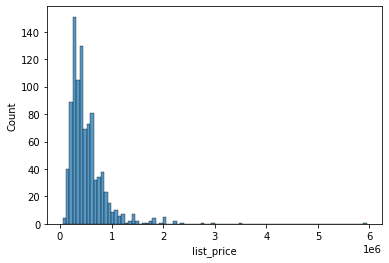

In [459]:
# Suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

sns.histplot(x="list_price", data=df2)
plt.show()
plt.close()

Skewed due to outliers; let's check the central tendency and max., min.

In [460]:
df2.list_price.agg(["max", "min", "mean", "median", "std"])

max      5950000.00
min        48750.00
mean      524398.21
median    430000.00
std       391340.10
Name: list_price, dtype: float64

Visualise property prices in box plot format to check outliers

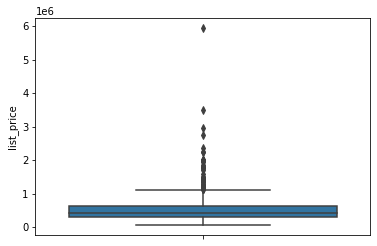

In [461]:
sns.boxplot(y="list_price", data=df2)
plt.show()
plt.close()

In [462]:
df2.describe()

,list_price
count,949.00
mean,524398.21
std,391340.10
min,48750.00
25%,300000.00
50%,430000.00
75%,629950.00
max,5950000.00


In [463]:
df2.dtypes

list_price       int64
list_info       object
rooms           object
location        object
bedrooms        object
bathrooms       object
living_rooms    object
dtype: object

'Bedrooms' column is still showing as having data type 'object'; convert to interger

In [464]:
df2.bedrooms = df2.bedrooms.astype("int64")
df2.dtypes

list_price       int64
list_info       object
rooms           object
location        object
bedrooms         int64
bathrooms       object
living_rooms    object
dtype: object

In [465]:
df2.describe()

,list_price,bedrooms
count,949.00,949.00
mean,524398.21,2.93
std,391340.10,1.38
min,48750.00,0.00
25%,300000.00,2.00
50%,430000.00,3.00
75%,629950.00,4.00
max,5950000.00,12.00


Create a subset of the dataset with outliers removed (properties over £1m)

In [466]:
df_under1m = df2[df2.list_price < 1000000]

In [467]:
df_under1m.describe()

,list_price,bedrooms
count,887.00,887.00
mean,451171.27,2.77
std,204216.62,1.24
min,48750.00,0.00
25%,290000.00,2.00
50%,425000.00,3.00
75%,595000.00,4.00
max,995000.00,9.00


Check median property price now that outliers (properties above £1m) have been excluded

In [468]:
df_under1m.list_price.median()

425000.0

Median house price = 425,000

Visualise distribution of property prices (under £1m)

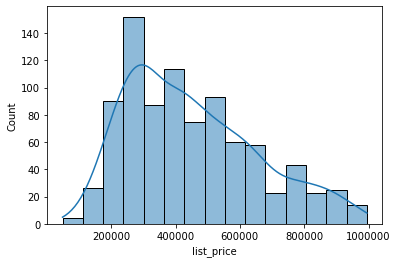

In [469]:
sns.histplot(x="list_price", data=df_under1m, kde=True)
plt.ticklabel_format(style="plain")
plt.show()
plt.close()

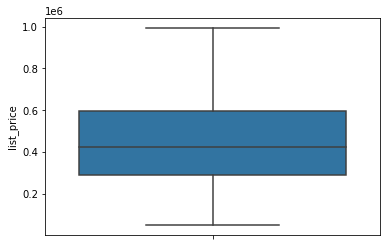

In [470]:
sns.boxplot(y="list_price", data=df_under1m)
plt.show()
plt.close()

Most properties are between £300,000 and £600,000.

Percentage of properties by number of bedrooms:

In [506]:
percentage = pd.DataFrame(df_under1m.bedrooms.value_counts(normalize=True))
percentage

,bedrooms
3,0.29
2,0.28
4,0.22
1,0.14
5,0.05
0,0.02
6,0.01
9,0.00
7,0.00
8,0.00


In [510]:
df_under1m.bedrooms.value_counts().sum()

887

Visualise price vs. number of bedrooms

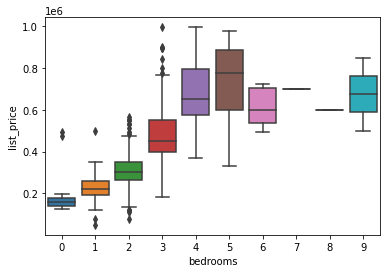

In [473]:
sns.boxplot(data=df_under1m, x="bedrooms", y="list_price")
plt.show()

There appears to be a clear difference in list price based on the number of bedrooms. A steady upward trend can be observed for properties with 0 - 5 bedrooms, with little overlap with one another, showing a fairly uniform increase in list price as the number of bedrooms go up. From 4-bed properties onwards, there appears to be little correlation between number of bedrooms and list price, but this may be due to the low sample size for these property types and the fact that properties over £1m had been excluded. This can be confirmed by further correlation analysis if of interest.

Create a subset of the dataset which only contains properties with 1 - 5 bedrooms

In [474]:
onetofivebeds = df_under1m[(df_under1m.bedrooms >= 1) & (df_under1m.bedrooms < 6)]
onetofivebeds.sample(20)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms
107,675000,detached house,"[Bedrooms, 4, Bathrooms, 2, Living rooms, 2, ]","Nabbs Hill Close, Tilehurst, Reading, Berkshir...",4,2,2
631,295000,maisonette,"[Bedrooms, 2, Bathrooms, 2, Living rooms, 1, ]","Carey Road, Wokingham RG40",2,2,1
798,625000,semi-detached house,"[Bedrooms, 4, Bathrooms, 2, Living rooms, 2, ]","Nicholson Drive, Wokingham RG41",4,2,2
344,465000,end terrace house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 3, ]","Cecil Aldin Drive, Tilehurst, Reading, Berkshi...",3,1,3
747,549950,semi-detached house,"[Bedrooms, 3, Bathrooms, 2, Living rooms, 3, ]","Havelock Road, Wokingham RG41",3,2,3
348,500000,end terrace house,"[Bedrooms, 4, Bathrooms, 1, Living rooms, 2, ]","Bulmershe Road, Earley, Reading RG1",4,1,2
521,250000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Argyle Road, Reading, Berkshire RG1",2,1,1
771,420000,semi-detached house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 2, ]","Grovelands Road, Reading, Berkshire RG30",3,1,2
605,650000,flat,"[Bedrooms, 4, Bathrooms, 4, Living rooms, 4, ]","London Road, Reading RG1",4,4,4
562,420000,flat,"[Bedrooms, 2, Bathrooms, 2, Living rooms, 1, ]","Danesfield, Wiltshire Road, Wokingham, Berkshi...",2,2,1


In [475]:
onetofivebeds.bedrooms.describe()

count   861.00
mean      2.76
std       1.10
min       1.00
25%       2.00
50%       3.00
75%       4.00
max       5.00
Name: bedrooms, dtype: float64

Find the median prices for properties based on number of bedrooms

In [476]:
median_onetofive = onetofivebeds.groupby("bedrooms").list_price.apply(lambda x: np.percentile(x, 50)).reset_index()
median_onetofive

,bedrooms,list_price
0,1,220000.00
1,2,300000.00
2,3,450000.00
3,4,650000.00
4,5,775000.00


Visualise the above in a scatterplot to demonstrate positive upward trajectory

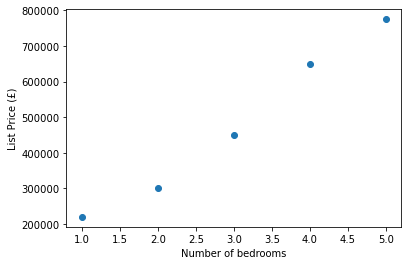

In [477]:
plt.scatter(x=median_onetofive.bedrooms, y=median_onetofive.list_price)
plt.xlabel("Number of bedrooms")
plt.ylabel("List Price (£)")
plt.show()


In [478]:
df_under1m.list_info.value_counts()

flat                       252
detached house             190
semi-detached house        169
terraced house             103
end terrace house           50
maisonette                  23
detached bungalow           17
studio                      15
bungalow                    15
town house                  15
link-detached house         15
property                    10
cottage                      5
mobile/park home             4
penthouse                    1
semi-detached bungalow       1
etached house                1
lodge                        1
Name: list_info, dtype: int64

Create a function to divide properties into two main categories: flat or house

In [479]:
def house_flats(value):
    if "flat" in value:
        return "flat"
    elif "maisonette" in value:
        return "flat"
    elif value == "studio":
        return "flat"
    elif value == "penthouse":
        return "flat"
    elif value == "lodge":
        return "flat"
    else:
        return "house"

df_under1m["property_type"] = df_under1m.list_info.apply(lambda x: house_flats(x))
df_under1m.sample(30)

/var/folders/n6/w301ddls6l330t92ry0gygj80000gn/T/ipykernel_4904/4243415264.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under1m["property_type"] = df_under1m.list_info.apply(lambda x: house_flats(x))


,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms,property_type
847,325000,terraced house,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 2, ]","Bedford Road, Reading, Berkshire RG1",2,1,2,house
325,440000,end terrace house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]","Norreys Avenue Wokingham, Berkshire RG40",3,1,1,house
540,220000,flat,"[Bedrooms, 2, Bathrooms, 2, Living rooms, 1, ]","Westgate Court, Oxford Road, Reading, Berkshir...",2,2,1,flat
363,205000,flat,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","The Green, Theale, Reading, Berkshire RG7",1,1,1,flat
670,325000,semi-detached house,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Shilling Close, Tilehurst, Reading, Berkshire ...",2,1,1,house
703,525000,semi-detached house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 2, ]","Wroxham Road, Woodley, Reading RG5",3,1,2,house
601,335000,flat,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]","Hartslock Court, Shooters Hill, Pangbourne, Be...",3,1,1,flat
728,499950,semi-detached house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]","Wokingham Road, Earley, Reading RG6",3,1,1,house
172,525000,detached house,"[Bedrooms, 4, Bathrooms, 2, Living rooms, 2, ]","Rushmoor Gardens, Calcot, Reading RG31",4,2,2,house
800,475000,semi-detached house,"[Bedrooms, 4, Bathrooms, 2, Living rooms, 1, ]","Boston Avenue, Reading RG1",4,2,1,house


In [480]:
df_under1m.property_type.value_counts()

house    597
flat     290
Name: property_type, dtype: int64

Visualise the difference in price between flats and houses

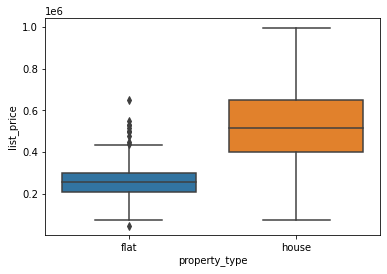

In [481]:
sns.boxplot(data=df_under1m, x="property_type", y="list_price")
plt.show()

Find the median of each category: number of bed - median list price

In [482]:
flat_house = df_under1m.groupby(["property_type", "bedrooms"])["list_price"].median().reset_index()
flat_house.head(20)

,property_type,bedrooms,list_price
0,flat,0,160000.00
1,flat,1,220000.00
2,flat,2,290000.00
3,flat,3,325000.00
4,flat,4,650000.00
5,house,0,495000.00
6,house,1,265000.00
7,house,2,350000.00
8,house,3,460000.00
9,house,4,650000.00


Use pivot function to reorganise table

In [483]:
flat_house_pivot = flat_house.pivot(columns="property_type", index="bedrooms", values="list_price")
flat_house_pivot

property_type,flat,house
bedrooms,,
0,160000.00,495000.00
1,220000.00,265000.00
2,290000.00,350000.00
3,325000.00,460000.00
4,650000.00,650000.00
5,NaN,775000.00
6,NaN,600000.00
7,NaN,700000.00
8,NaN,600000.00


In [512]:
flat_house_pivot["percentage of increase"] = ((flat_house_pivot.house - flat_house_pivot.flat) / flat_house_pivot.flat) * 100
flat_house_pivot

property_type,flat,house,percentage of increase
bedrooms,,,
0,160000.00,495000.00,209.38
1,220000.00,265000.00,20.45
2,290000.00,350000.00,20.69
3,325000.00,460000.00,41.54
4,650000.00,650000.00,0.00
5,NaN,775000.00,NaN
6,NaN,600000.00,NaN
7,NaN,700000.00,NaN
8,NaN,600000.00,NaN


In [484]:
flats = df_under1m[df_under1m.property_type == "flat"]
houses = df_under1m[df_under1m.property_type == "house"]

flats.head(10)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms,property_type
0,75000,studio,"[Bedrooms, 1, ]","Flat 3, 34 Eastern Avenue, Reading, Berkshire RG1",1,NaN,NaN,flat
1,130000,studio,"[Bedrooms, 1, Bathrooms, 1, Living rooms, 1, ]","Watersfield Close, Lower Earley, Reading RG6",1,1,1,flat
2,150000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Colleton Drive, Twyford, Berkshire RG10",0,1,1,flat
3,140000,studio,"[Bathrooms, 1, Living rooms, 1, ]","George Street, Reading RG1",0,1,1,flat
4,175000,studio,"[Living rooms, 1, ]","Central Reading RG1,",0,NaN,1,flat
5,475000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Hobbs End, Henley-On-Thames RG9",0,1,1,flat
6,160000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Beech Lane, Lower Earley, Reading RG6",0,1,1,flat
7,135000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Tippett Rise, Reading RG2",0,1,1,flat
8,130000,studio,"[Bathrooms, 1, Living rooms, 1, ]","Castle Hill, Reading, Berkshire RG1",0,1,1,flat
9,160000,studio,"[Bathrooms, 1, ]","Tippett Rise, Reading, Berkshire RG2",0,1,NaN,flat


In [485]:
print(len(flats))

290


In [486]:
houses.head(10)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms,property_type
16,399000,bungalow,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 2, ]","Bridport Close, Lower Earley, Reading RG6",2,1,2,house
17,425000,bungalow,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Faygate Way, Lower Earley, Reading RG6",2,1,1,house
18,330000,bungalow,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Rushmoor Gardens, Calcot, Reading RG31",2,1,1,house
19,450000,bungalow,"[Bedrooms, 2, Bathrooms, 2, Living rooms, 2, ]","Birch Lane, Mortimer Common, Reading RG7",2,2,2,house
20,300000,bungalow,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Shirley Avenue, Reading RG2",2,1,1,house
21,350000,bungalow,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Highgrove Mews, Highgrove Street, Reading, Ber...",2,1,1,house
22,350000,bungalow,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Milsom Close, Shinfield, Reading, Berkshire RG2",2,1,1,house
23,640000,bungalow,"[Bedrooms, 3, Bathrooms, 2, Living rooms, 3, ]","Westview Drive, Twyford, Reading, Berkshire RG10",3,2,3,house
24,525000,bungalow,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]","The Vines, Wokingham, Berkshire RG41",3,1,1,house
25,625000,bungalow,"[Bedrooms, 3, Bathrooms, 2, Living rooms, 2, ]","Windsor Ride, Finchampstead, Wokingham RG40",3,2,2,house


In [487]:
print(len(houses))

597


Visualise the difference in price for houses

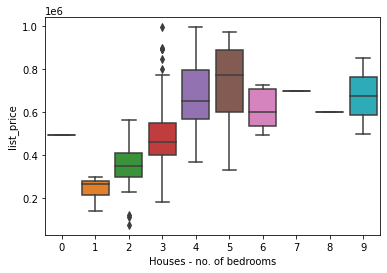

In [488]:
sns.boxplot(data=houses, x="bedrooms", y="list_price")
plt.xlabel("Houses - no. of bedrooms")
plt.show()

Visualise the difference in price for flats

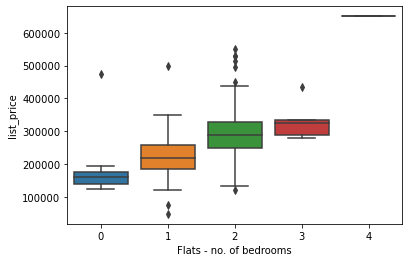

In [489]:
sns.boxplot(data=flats, x="bedrooms", y="list_price")
plt.xlabel("Flats - no. of bedrooms")
plt.show()

In [490]:
flats.describe()

,list_price,bedrooms
count,290.00,290.00
mean,264065.55,1.56
std,80923.76,0.63
min,48750.00,0.00
25%,210000.00,1.00
50%,258475.00,2.00
75%,300000.00,2.00
max,650000.00,4.00


In [491]:
flats.list_price.median()

258475.0

Visualise the distrubtion of list price for flats only

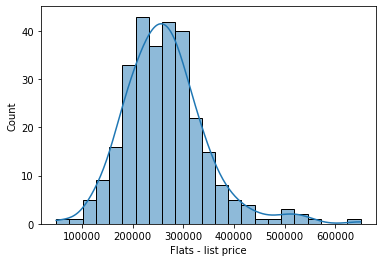

In [492]:
sns.histplot(data=flats, x="list_price", kde=True)
plt.ticklabel_format(style="plain")
plt.xlabel("Flats - list price")
plt.show()
plt.close()

In [493]:
houses.describe()

,list_price,bedrooms
count,597.00,597.00
mean,542060.14,3.36
std,183063.93,1.02
min,74950.00,0.00
25%,400000.00,3.00
50%,515000.00,3.00
75%,650000.00,4.00
max,995000.00,9.00


In [494]:
houses.list_price.median()

515000.0

In [513]:
houses[houses.bedrooms == 2].describe()

,list_price,bedrooms
count,81.00,81.00
mean,355010.37,2.00
std,86222.88,0.00
min,74950.00,2.00
25%,300000.00,2.00
50%,350000.00,2.00
75%,412000.00,2.00
max,565000.00,2.00


In [515]:
houses[houses.bedrooms == 3].describe()

,list_price,bedrooms
count,255.00,255.00
mean,483343.08,3.00
std,124584.80,0.00
min,180000.00,3.00
25%,400000.00,3.00
50%,460000.00,3.00
75%,550000.00,3.00
max,995000.00,3.00


In [514]:
flats[flats.bedrooms == 2].describe()

,list_price,bedrooms
count,163.00,163.00
mean,295189.45,2.00
std,70080.26,0.00
min,122000.00,2.00
25%,250000.00,2.00
50%,290000.00,2.00
75%,327475.00,2.00
max,550000.00,2.00


In [516]:
flats[flats.bedrooms == 3].describe()

,list_price,bedrooms
count,5.00,5.00
mean,333000.00,3.00
std,61502.03,0.00
min,280000.00,3.00
25%,290000.00,3.00
50%,325000.00,3.00
75%,335000.00,3.00
max,435000.00,3.00


Visualise the distribution of list price for houses

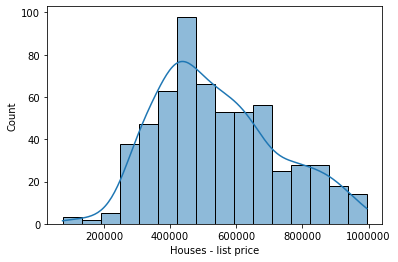

In [495]:
sns.histplot(data=houses, x="list_price", kde=True)
plt.ticklabel_format(style="plain")
plt.xlabel("Houses - list price")
plt.show()
plt.close()

Visualise the difference in list price between houses and flats using an overlapping histogram

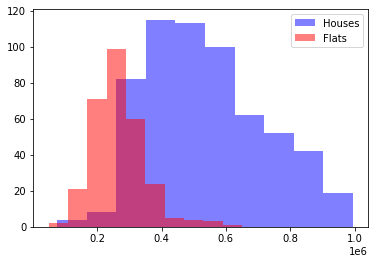

In [496]:
plt.hist(houses.list_price, color="blue", label="Houses", alpha=0.5)
plt.hist(flats.list_price, color="red", label="Flats", alpha=0.5)
plt.legend()
plt.show()

As we are most interested in two-bed and three-bed properties, let's compare the list price of these properties.

Create a subset of the datset which only contains two-bed and three-bed properties.

In [497]:
two_three_beds = df_under1m[(df_under1m.bedrooms == 2) | (df_under1m.bedrooms == 3)]
two_three_beds.sample(10)

,list_price,list_info,rooms,location,bedrooms,bathrooms,living_rooms,property_type
551,250000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Meadow Way, Amersham Road, Caversham, Berkshir...",2,1,1,flat
904,350000,terraced house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 2, ]","Bourton Close, Tilehurst, Reading RG30",3,1,2,house
873,389950,terraced house,"[Bedrooms, 3, Bathrooms, 1, Living rooms, 1, ]","Medina Close, Wokingham RG41",3,1,1,house
83,425000,detached house,"[Bedrooms, 3, Bathrooms, 2, Living rooms, 1, ]","Mill Close, Wokingham, Berkshire RG41",3,2,1,house
877,500000,terraced house,"[Bedrooms, 3, Living rooms, 1, ]","Woodley, Berkshire RG5",3,NaN,1,house
466,265000,flat,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Northumberland Avenue, Reading, Berkshire RG2",2,1,1,flat
691,400000,semi-detached house,"[Bedrooms, 3, Bathrooms, 2, Living rooms, 3, ]","Curtis Road, Calcot, Reading, Berkshire RG31",3,2,3,house
17,425000,bungalow,"[Bedrooms, 2, Bathrooms, 1, Living rooms, 1, ]","Faygate Way, Lower Earley, Reading RG6",2,1,1,house
678,400000,semi-detached house,"[Bedrooms, 2, Bathrooms, 2, Living rooms, 2, ]","Stoneham Close, Tilehurst, Reading RG30",2,2,2,house
520,240000,flat,"[Bedrooms, 2, Bathrooms, 2, Living rooms, 1, ]","Ashdene Gardens, Reading, Berkshire RG30",2,2,1,flat


Visualise the respective list price of the four types of properties: 2-bed houses, 2-bed flats, 3-bed houses, 3-bed flats.

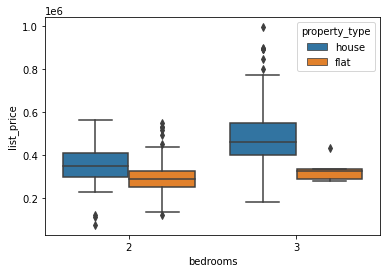

In [498]:
sns.boxplot(data=two_three_beds, x="bedrooms", y="list_price", hue="property_type")
plt.show()

There is some overlap in list price between 2-bed flats and 2-bed houses. The difference in list price between 3-bed flats and 3-bed houses is more significant, with no overlap. Note the much smaller amount of 3-bed flats on the market.

End of analysis